# pretty plots to show LO boundaries and Salish Sea

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy
import cartopy.mpl.geoaxes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.gridspec import GridSpec
import cmocean as cm
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
grid = xr.open_dataset('/data1/parker/LO_data/grids/cas6/grid.nc')

In [37]:
stations = pd.read_csv('/data1/bbeutel/LO_user/trace_metals/Anderlini_BC_Coast_2010.csv')
stations.head()

,Station,Longitude [degrees_east],Latitude [degrees_north],Depth (m),Mn (nmol/kg),Mn error (nmol/kg),Fe (nmol/kg),Fe error (nmol/kg),Co (nmol/kg),Co error (nmol/kg),Ni (nmol/kg),Ni error (nmol/kg),Cu (nmol/kg),Cu error (nmol/kg),Zn (nmol/kg),Zn error (nmol/kg),Cd (nmol/kg),Cd error (nmol/kg),Pb (pmol/kg),Pb error (pmol/kg)
0,WH7,234.744,47.141,20,1.639568,0.015732,0.228841,0.003101,0.040047,0.001240,3.993529,0.038764,1.103735,0.007461,0.250777,0.004775,0.098318,0.002316,49.342391,0.679769
1,WH7,234.744,47.141,50,1.209472,0.006614,0.266460,0.002493,0.056509,0.000668,4.312539,0.039755,1.636177,0.015112,0.649553,0.008589,0.294769,0.004070,57.116852,1.207411
2,WH7,234.744,47.141,100,0.699904,0.008115,0.381750,0.002771,0.078598,0.000628,4.821264,0.053208,1.460980,0.012718,1.319579,0.010002,0.685452,0.006865,69.505901,0.808487
3,WH7,234.744,47.141,150,1.104243,0.007746,0.990661,0.010706,0.080633,0.001279,5.303980,0.065196,1.671537,0.018118,2.493675,0.018864,0.857909,0.009212,73.722231,0.839717
4,WH7,234.744,47.141,200,1.204578,0.014819,1.494951,0.023030,0.088798,0.000739,5.717482,0.054745,1.676260,0.015936,3.862653,0.026996,0.904985,0.009015,66.477087,0.467243


Text(-125.5, 46.5, 'CUC')

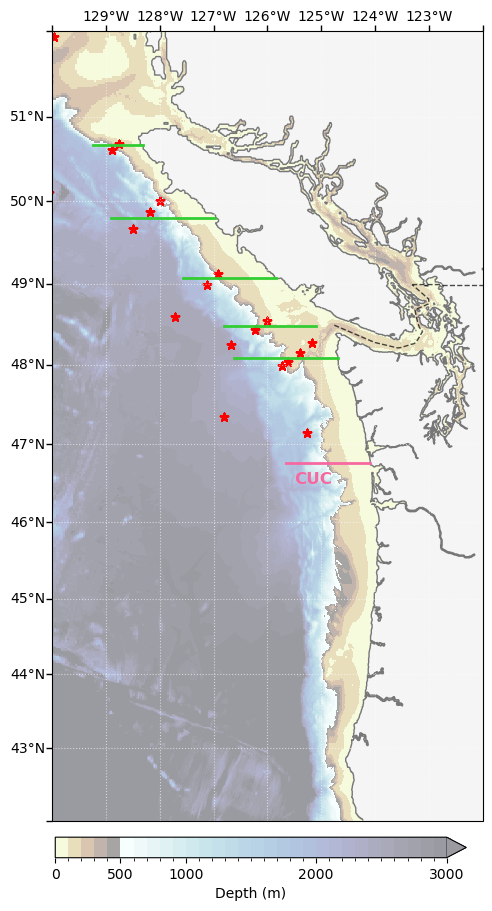

In [ ]:
xlim, ylim = [-150, -115], [33, 62]
proj= crs.Mercator(np.mean(xlim), *ylim)

fig = plt.figure(constrained_layout=True, figsize=[7,9])
gs = GridSpec(1, 1, figure=fig)
ax0 = fig.add_subplot(gs[:,:], projection=proj)
# ax1 = fig.add_subplot(gs[0,3:], projection=proj)

#######################
# Analysis Boundaries #
#######################

# Make plot area
xlim, ylim = [-130, -122], [42, 52]
# proj= crs.Mercator(np.mean(xlim), *ylim)
ax0.set_extent(xlim+ylim)

#Depth
X, Y = grid.lon_rho, grid.lat_rho

# Create custom colormap
colors1 = cm.cm.turbid(np.linspace(0, 1, 5))  # First colormap from 0 to 200m
colors2 = cm.cm.ice_r(np.linspace(0, 1, 25))  # Second colormap from 200m to 2000m
colors = np.vstack((colors1, colors2))
custom_cmap = ListedColormap(colors, name='CustomCMap')

# Create a normalization instance that maps the depths to the combined colormap
bounds = np.concatenate([np.arange(0, 500, 100), np.arange(500, 3001, 100)])
norm = BoundaryNorm(bounds, custom_cmap.N)

# Plot the depth data using the custom colormap
c = ax0.pcolormesh(X, Y, grid.h, cmap=custom_cmap, norm=norm, transform=crs.PlateCarree(), zorder=0,alpha=0.4)

cbar = plt.colorbar(c, ax=ax0, orientation='horizontal', fraction=0.026, pad=0.02, ticks=[0, 500, 1000, 2000,3000], extend='max')
cbar.set_label('Depth (m)')
cbar.ax.set_xticklabels(['0', '500', '1000', '2000','3000'])

# ax.contour(X, Y,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.4)

# Draw coastline
ax0.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke',zorder=1,transform=crs.PlateCarree())
ax0.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray',zorder=1, transform=crs.PlateCarree(),alpha=0.9)

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax0.gridlines(linestyle=":", color='w', alpha=0.6, draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.right_labels = False
gl.bottom_labels = False


# Manually add ticks at the grid locations
ax0.set_xticks(xlocs, crs=crs.PlateCarree())  
ax0.set_yticks(ylocs, crs=crs.PlateCarree())
ax0.set_xticklabels([],)  
ax0.set_yticklabels([],)
ax0.tick_params(
    axis='x', direction='out', length=4, width=1, color='black', top=True, bottom=False  # Ticks only on top
)
ax0.tick_params(
    axis='y', direction='out', length=4, width=1, color='black', left=True, right=False  # Ticks only on right
)

# add cross sections
ax0.plot([grid.lon_rho[0,194],grid.lon_rho[0,351]],[grid.lat_rho[560,0],grid.lat_rho[560,0]], lw=2, c='#f768a1',transform=crs.PlateCarree())
ax0.plot([grid.lon_rho[0, 20],grid.lon_rho[0,50]],[grid.lat_rho[1238,0],grid.lat_rho[1238,0]], lw=2, c='limegreen',transform=crs.PlateCarree())
ax0.plot([grid.lon_rho[0, 30],grid.lon_rho[0,110]],[grid.lat_rho[1170,0],grid.lat_rho[1170,0]], lw=2, c='limegreen',transform=crs.PlateCarree())
ax0.plot([grid.lon_rho[0, 80],grid.lon_rho[0,180]],[grid.lat_rho[1070,0],grid.lat_rho[1070,0]], lw=2, c='limegreen',transform=crs.PlateCarree())
ax0.plot([grid.lon_rho[0, 120],grid.lon_rho[0,240]],[grid.lat_rho[940,0],grid.lat_rho[940,0]], lw=2, c='limegreen',transform=crs.PlateCarree())
ax0.plot([grid.lon_rho[0, 130],grid.lon_rho[0,280]],[grid.lat_rho[850,0],grid.lat_rho[850,0]], lw=2, c='limegreen',transform=crs.PlateCarree())

# sample locations
ax0.scatter(stations['Longitude [degrees_east]'], stations['Latitude [degrees_north]'],color='r',marker='*',transform=crs.PlateCarree())

# add canada USA border
ax0.add_feature(feature.BORDERS, linestyle='dashed', edgecolor='k', alpha=0.7, zorder=3)

# Add annotations
ax0.text(-125.5, 46.5, 'CUC', transform=crs.PlateCarree(),weight='bold',fontsize=12, color='#f768a1',zorder=4)



In [11]:
Pstation = np.arange(1,11)
Plat = [48.57, 48.6, 48.62, 48.65, 48.68, 48.74, 48.77, 48.82, 48.85, 48.88]
Plon = [-125.5,-126, -126.3,-126.7,-127.2,-127.7,-128.2,-128.7,-129.2,-129.7]

In [28]:
length1 = 18
length2 = 4
shelflons = [72+(10*i) for i in range(length1+length2)]
shelflats = [1195-(23*i) for i in range(length1)]+[804-(50*(i+1)) for i in range(length2)]


Text(-128.9, 48.9, 'P8')

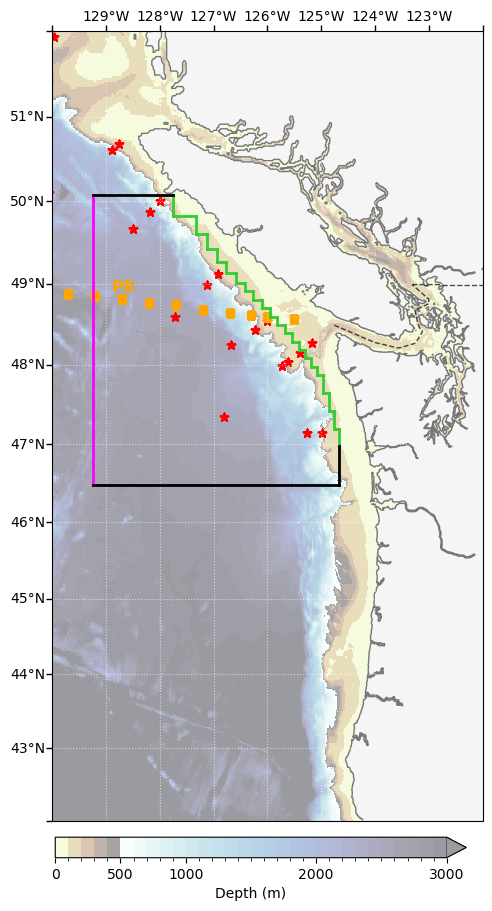

In [38]:
xlim, ylim = [-150, -115], [33, 62]
proj= crs.Mercator(np.mean(xlim), *ylim)

fig = plt.figure(constrained_layout=True, figsize=[7,9])
gs = GridSpec(1, 1, figure=fig)
ax0 = fig.add_subplot(gs[:,:], projection=proj)
# ax1 = fig.add_subplot(gs[0,3:], projection=proj)

#######################
# Analysis Boundaries #
#######################

# Make plot area
xlim, ylim = [-130, -122], [42, 52]
# proj= crs.Mercator(np.mean(xlim), *ylim)
ax0.set_extent(xlim+ylim)

#Depth
X, Y = grid.lon_rho, grid.lat_rho

# Create custom colormap
colors1 = cm.cm.turbid(np.linspace(0, 1, 5))  # First colormap from 0 to 200m
colors2 = cm.cm.ice_r(np.linspace(0, 1, 25))  # Second colormap from 200m to 2000m
colors = np.vstack((colors1, colors2))
custom_cmap = ListedColormap(colors, name='CustomCMap')

# Create a normalization instance that maps the depths to the combined colormap
bounds = np.concatenate([np.arange(0, 500, 100), np.arange(500, 3001, 100)])
norm = BoundaryNorm(bounds, custom_cmap.N)

# Plot the depth data using the custom colormap
c = ax0.pcolormesh(X, Y, grid.h, cmap=custom_cmap, norm=norm, transform=crs.PlateCarree(), zorder=0,alpha=0.4)

cbar = plt.colorbar(c, ax=ax0, orientation='horizontal', fraction=0.026, pad=0.02, ticks=[0, 500, 1000, 2000,3000], extend='max')
cbar.set_label('Depth (m)')
cbar.ax.set_xticklabels(['0', '500', '1000', '2000','3000'])

# ax.contour(X, Y,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.4)

# Draw coastline
ax0.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke',zorder=1,transform=crs.PlateCarree())
ax0.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray',zorder=1, transform=crs.PlateCarree(),alpha=0.9)

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax0.gridlines(linestyle=":", color='w', alpha=0.6, draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.right_labels = False
gl.bottom_labels = False


# Manually add ticks at the grid locations
ax0.set_xticks(xlocs, crs=crs.PlateCarree())  
ax0.set_yticks(ylocs, crs=crs.PlateCarree())
ax0.set_xticklabels([],)  
ax0.set_yticklabels([],)
ax0.tick_params(
    axis='x', direction='out', length=4, width=1, color='black', top=True, bottom=False  # Ticks only on top
)
ax0.tick_params(
    axis='y', direction='out', length=4, width=1, color='black', left=True, right=False  # Ticks only on right
)

# add cross sections
# Shelf:
ax0.plot([grid.lon_rho[0, shelflons[0]],grid.lon_rho[0,shelflons[0]]],[grid.lat_rho[shelflats[0],0],grid.lat_rho[shelflats[1],0]], lw=2, c='limegreen',transform=crs.PlateCarree())
ax0.plot([grid.lon_rho[0, shelflons[0]],grid.lon_rho[0,shelflons[1]]],[grid.lat_rho[shelflats[1],0],grid.lat_rho[shelflats[1],0]], lw=2, c='limegreen',transform=crs.PlateCarree())
for i in range(length1+length2-2):
    i+=1
    ax0.plot([grid.lon_rho[0, shelflons[i+1]],grid.lon_rho[0,shelflons[i+1]]],[grid.lat_rho[shelflats[i+1],0],grid.lat_rho[shelflats[i],0]], lw=2, c='limegreen',transform=crs.PlateCarree())
    ax0.plot([grid.lon_rho[0, shelflons[i]],grid.lon_rho[0,shelflons[i+1]]],[grid.lat_rho[shelflats[i],0],grid.lat_rho[shelflats[i],0]], lw=2, c='limegreen',transform=crs.PlateCarree())
# Offshore:
ax0.plot([grid.lon_rho[0, 20],grid.lon_rho[0,20]],[grid.lat_rho[shelflats[0],0],grid.lat_rho[shelflats[-1]-100,0]], lw=2, c='magenta',transform=crs.PlateCarree())
ax0.plot([grid.lon_rho[0, 20],grid.lon_rho[0,shelflons[0]]],[grid.lat_rho[shelflats[0],0],grid.lat_rho[shelflats[0],0]], lw=2, c='k',transform=crs.PlateCarree())
ax0.plot([grid.lon_rho[0, 20],grid.lon_rho[0,shelflons[-1]]],[grid.lat_rho[shelflats[-1]-100,0],grid.lat_rho[shelflats[-1]-100,0]], lw=2, c='k',transform=crs.PlateCarree())
ax0.plot([grid.lon_rho[0,shelflons[-1]],grid.lon_rho[0,shelflons[-1]]],[grid.lat_rho[shelflats[-1]-100,0],grid.lat_rho[shelflats[-1],0]], lw=2, c='k',transform=crs.PlateCarree())


# sample locations
ax0.scatter(stations['Longitude [degrees_east]'], stations['Latitude [degrees_north]'],color='r',marker='*',transform=crs.PlateCarree())
ax0.scatter(Plon, Plat,color='orange',marker='s',transform=crs.PlateCarree())


# add canada USA border
ax0.add_feature(feature.BORDERS, linestyle='dashed', edgecolor='k', alpha=0.7, zorder=3)

# Add annotations
ax0.text(-128.9, 48.9, 'P8', transform=crs.PlateCarree(),weight='bold',fontsize=12, color='orange',zorder=4)



In [5]:
# interested to know the lowest resolution within the analysis domain
from math import sin, cos, sqrt, atan2, radians

def dist_earth(lat1,lat2,lon1,lon2):
    # approximate distance between two cells

    # Approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

# assume that they're somehere on the north or south (full line) transect

# south transect
lons = grid.lon_rho[0, 128:317]
lat = grid.lat_rho[714,0]
print([dist_earth(lat,lat,lons[i],lons[i+1]) for i in range(len(lons)-1)])

# north transect 
lons = grid.lon_rho[0, 73:162]
lat = grid.lat_rho[1103,0]
print([dist_earth(lat,lat,lons[i],lons[i+1]) for i in range(len(lons)-1)])


[1.297699731755899, 1.2925602158783254, 1.2874410549562427, 1.2823421683776177, 1.277263475844163, 1.2722048973789915, 1.2671663533227895, 1.2621477643242514, 1.2571490513553847, 1.2521701357000306, 1.2472109389442998, 1.2422713829976149, 1.2373513900697546, 1.2324508826842457, 1.2275697836687964, 1.222708016155296, 1.217865503579817, 1.2130421696902647, 1.2082379385234228, 1.203452734425996, 1.1986864820393044, 1.193939106308852, 1.1892105324728435, 1.184500686066015, 1.1798094929177187, 1.175136879153836, 1.1704827711910386, 1.1658470957387015, 1.1612297797912507, 1.1566307506377291, 1.1520499358560556, 1.1474872633072883, 1.1429426611356226, 1.138416057781783, 1.1339073819524141, 1.1294165626526043, 1.1249435291629257, 1.120488211035611, 1.1160505381117696, 1.1116304405156485, 1.1072278486297633, 1.1028426931331576, 1.0984749049574052, 1.0941244153306073, 1.089791155735309, 1.085475057935278, 1.0811760539640298, 1.076894076115259, 1.0726290569638866, 1.0683809293373612, 1.0641496263